## Uso y aplicación de los métodos de agrupamiento

Aprendizaje no supervisado

- Jaime Díaz González (coordinador)
- Jordi Tudela Alcacer (secretario)
- Alvaro Navarro Guzmán (revisor)

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#### DataSet 1: Liver Disease

The first 5 variables are all blood tests which are thought
to be sensitive to liver disorders that might arise from
excessive alcohol consumption.

https://archive.ics.uci.edu/ml/datasets/liver+disorders

In [2]:
nms=["Mean corpuscular volume", "alkaline phosphotase","alanine aminotransferase", "aspartate aminotransferase",
     "gamma-glutamyl transpeptidase","half-pint aquivalents per day", "split"]

liver=pd.read_table('DataSets/Liver_Disease.csv', sep=';', names =nms )

#Eliminamos la variable "etiqueta" de este dataset y de esta forma transformamos el set de datos en uno en el que 
#desconocemos el agrupamiento.
liver=liver.iloc[:,0:6]
liver.sample(5)

,Mean corpuscular volume,alkaline phosphotase,alanine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,half-pint aquivalents per day
106,91,80,37,23,27,4.0
224,90,64,12,17,14,0.5
161,93,50,18,25,17,6.0
91,86,48,20,20,6,3.0
179,90,50,26,22,53,8.0


#### DataSet 2: Zoo Animals

A simple database containing 17 Boolean-valued attributes. The idea is to relate this descriptors with an specific class of animal.

https://archive.ics.uci.edu/ml/datasets/zoo

In [3]:
zoo=pd.read_table('DataSets/Zoo_DataSet.csv', sep=';' , 
                  names = ["animal name", "hair", "feathers", "eggs","milk", "airborne", "aquatic", 
                           "predator", "toothed", "backbone", "breathes","venomous", "fins", "legs",
                           "tail", "domestic", "catsize", "type" ])

#Este será el set de datos del que conocemos el agrupamiento real
zoo.sample(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
59,pheasant,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


#### 0. PREPROCESADO

Durante la etapa de preprocesado buscamos comprobar la sanidad de los datos de cara a un correcto análisis. Para ello, **se eliminarán las entradas con valores nulos** para evitar una fuente de ruido innecesario. Luego, se buscará homogeneizar la distribución de cada una de las etiquetas mediante **estandarización** para asegurar que ningún parámetro domina por razones de rango y, finalmente, se comprobará si es conveniente **reducir la dimensionalidad del dataset mediante PCA**.

En caso que reducir la dimensionalidad no fuera conveniente, se usarán las primeras 2 componentes del PCA generar una proyección de los datos donde visualizar las propuestas de agrupamiento de los distintos algoritmos.

In [4]:
# DataSet 1: Enfermedad del pulmón
####################################

# Eliminamos las filas en las que haya algún NaN
liver.dropna(inplace=True)

#Estandarizamos las columnas del dataset, de esta forma no habrá ninguna columna que pese más por el rago
#dinámico en el que se mueve y tienda a sesgar la descomposición en componentes principales.
standardizer = preprocessing.StandardScaler()
liver_std = standardizer.fit_transform(liver.astype('float64'))

# Aplicamos una PCA para poder representar en 2D los atributos sobre los que aplicar las medidas de clustering
pca = PCA()
PCs_liver = pca.fit_transform(liver_std.astype('float64'))
principal_liver = pd.DataFrame(data = PCs_liver[:,:2], columns = ['PC 1', 'PC 2'])

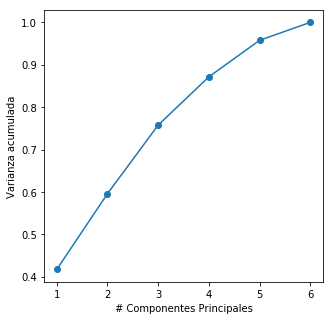

In [5]:
#Comprobamos la varianza acumulada por las PCs de la PCA
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(range(1,len(nms)), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('# Componentes Principales')
plt.ylabel('Varianza acumulada');
plt.show()

Dado el bajo número de componentes y cuán poca varianza son capaces de representar cada uno de ellos, no resulta conveniente usar en este caso reducción de dimensionalidad para generar agrupamientos.

In [6]:
X_liver = liver_std

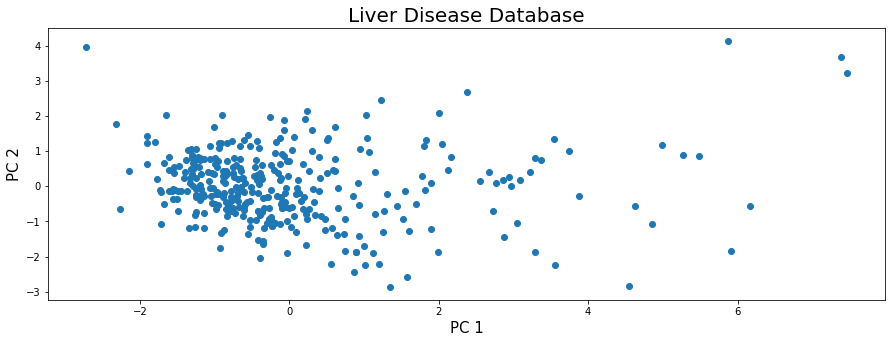

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(PCs_liver[:,0],PCs_liver[:,1])
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Liver Disease Database', fontsize = 20)
plt.show()

In [8]:
# DataSet 2: Animales del Zoo
#################################

# Separamos la primera y la última columna del dataframe
zoo_label=zoo.iloc[:,-1]
zoo=zoo.iloc[:,1:-1]

# Eliminamos las filas en las que haya algún NaN
zoo.dropna(inplace=True)

#Estandarizamos las columnas del dataset
standardizer = preprocessing.StandardScaler()
zoo_std = standardizer.fit_transform(zoo.astype('float64'))

# Aplicamos una PCA para poder representar en 2D los atributos sobre los que aplicar las medidas de clustering
pca = PCA()
PCs_zoo = pca.fit_transform(zoo_std.astype('float64'))
principal_zoo = pd.DataFrame(data = PCs_zoo[:,:2], columns = ['PC 1', 'PC 2'])

0 0.2919109074054147
1 0.5007399445459042
2 0.6485221777730709
3 0.7254557673316224
4 0.785076904278825
5 0.8317039970036457
6 0.86687980993988
7 0.898906499066013
8 0.9268935284678848
9 0.9506344421163475
10 0.9679833460857357
11 0.9811538171415131
12 0.9892501800559761
13 0.996621566649866
14 0.9988885385110925
15 0.9999999999999998


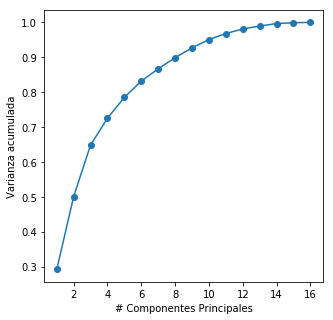

In [9]:
for i,x in enumerate(np.cumsum(pca.explained_variance_ratio_)):
     print(i,x)

#Comprobamos la varianza acumulada por las PCs de la PCA
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(range(1, zoo.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('# Componentes Principales')
plt.ylabel('Varianza acumulada');
plt.show()

Tras el analisis de componentes principales se observa que hay varias dimensiones que no aportan un incremento sustancial en la explicación de la varianza. 

En este caso se usarán 9 componentes capaces de explicar más del 95% de la varianza.

In [10]:
X_zoo, Y_zoo = PCs_zoo[:,:9], zoo_label

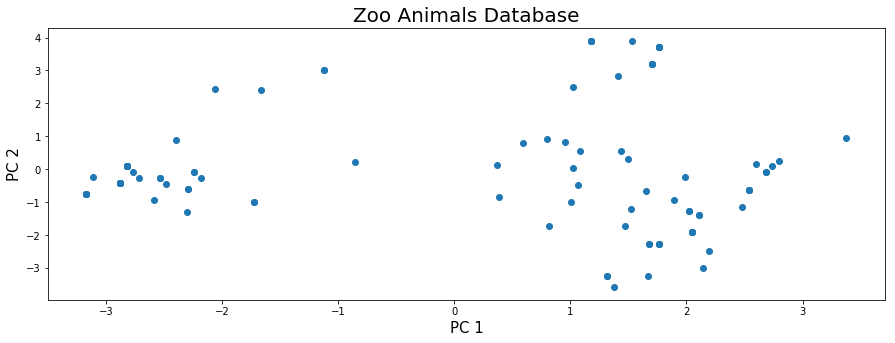

In [11]:
#En este caso, la varianza explicada es incluso menos (~50%), pero seguiremos usando dos PCs por las mismas
#razones, para facilitar una visualización 2D.

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(PCs_zoo[:,0],PCs_zoo[:,1])
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Zoo Animals Database', fontsize = 20)
plt.show()

##### A. Evaluación extrínseca

In [12]:
#Definimos las medidas de evaluación extrínseca

# medida de calidad es una métrica que usa una heurística propia para determinar la bondad de un modelo
def medida_calidad(mC):
    return 0.5 * (1 - medida_error(mC.T)) +  0.2 * medida_pureza(mC) + 0.3 * medida_f1(mC)

def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j])) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    if np.isnan(rec) or np.isnan(prec):
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign

def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))

    return np.sum([totales[k] * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])

def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def encontrar_mejor_clustering(resultados):
    return np.argmax(resultados)

def imprimir_evaluacion_extrinseca(mC):
    print('\nMedidas extrínsecas:')
    print('  El valor del error cometido es = ', medida_error(mC.T))
    print('  La pureza del agrupamiento = ', medida_pureza(mC))
    print('  La medida F1 = ', medida_f1(mC))

##### B. Evaluación intrínseca

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabaz_score

def imprimir_evaluacion_intrinseca(silueta, dataset, y_pred):
    print('\nMedidas intrínsecas:')
    print('  Silhouette = ', silueta)
    print('  Calinski-Harabaz = ', calinski_harabaz_score(dataset,y_pred))

#### 1. AGRUPAMIENTO POR PARTICIONES

#### DataSet 1

Elección de la mejor K usando el método de maximización de silhouette.

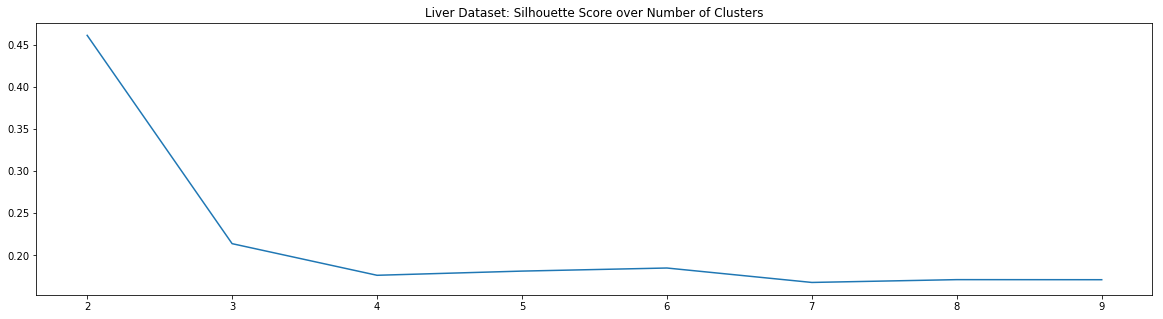

In [14]:
from sklearn.cluster import KMeans

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(2)

# Explorar la bondad del agrupamiento en función al número de clusters
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

scores = []
for n_clusters in range(MIN_CLUSTERS,MAX_CLUSTERS):
    clf = KMeans(n_clusters=n_clusters)
    y_pred = clf.fit_predict(X_liver)
    scores.append( silhouette_score(X_liver ,y_pred) )

plt.figure(figsize=(20,5))
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), scores )
plt.title("Liver Dataset: Silhouette Score over Number of Clusters")
plt.show()

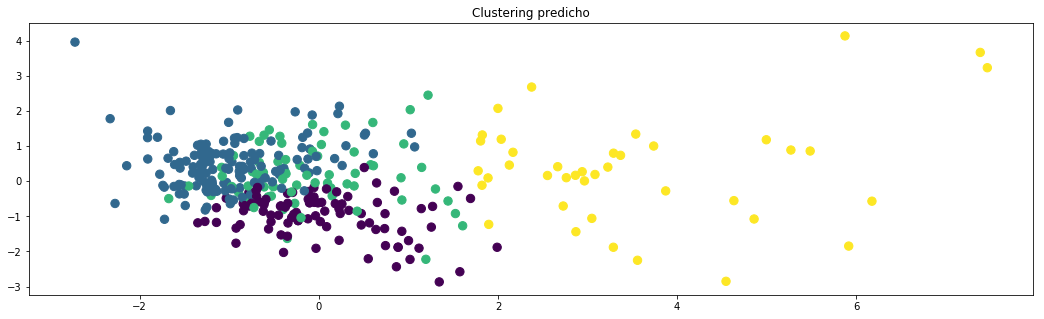

In [15]:
# Aplicar el mejor resultado
best_n_clusters = 2
y_pred = KMeans(n_clusters=MIN_CLUSTERS + best_n_clusters).fit_predict(X_liver)

# Mostrar resultados
fig = plt.figure(figsize=(18,5))
plt.title('Clustering predicho')
plt.scatter(PCs_liver[:,0], PCs_liver[:,1], c=y_pred, s=70)
plt.show()

print("El mejor agrupamiento tiene {} clusters:".format(MIN_CLUSTERS + best_n_clusters))

score = silhouette_score(X_liver, y_pred)
imprimir_evaluacion_intrinseca(score, X_liver, y_pred)
ds_1_eval_part=score

#### DataSet 2

Elección de la mejor K basado en maximización de la 'calidad'

El mejor agrupamiento tiene 4 clusters:

Medidas intrínsecas:
  Silhouette =  0.17838427477610674
  Calinski-Harabaz =  92.85930867665573


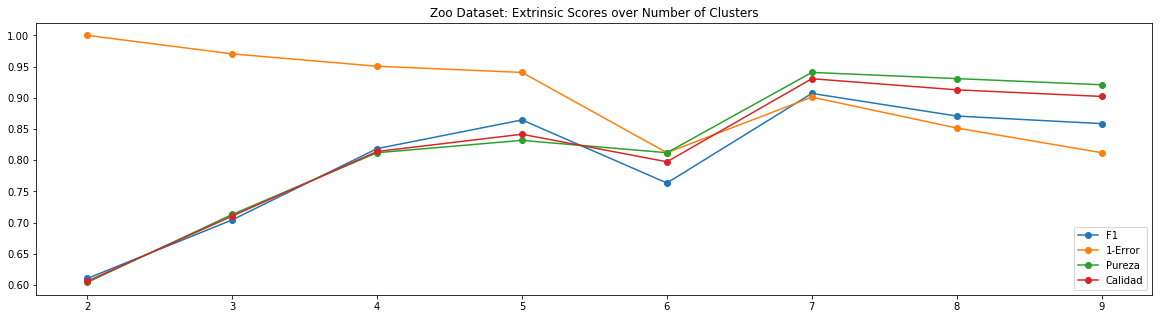

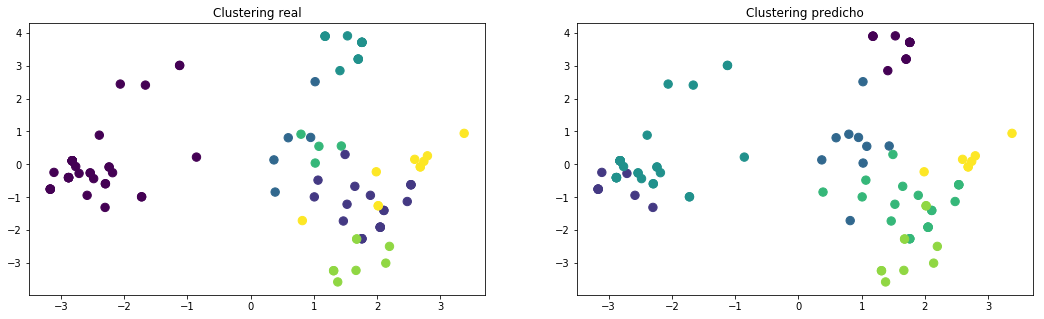

El mejor agrupamiento tiene 7 clusters:

Medidas extrínsecas:
  El valor del error cometido es =  0.07920792079207917
  La pureza del agrupamiento =  0.9207920792079209
  La medida F1 =  0.8885628637322602

Medidas intrínsecas:
  Silhouette =  0.38926320461574626
  Calinski-Harabaz =  38.50711437054243


In [16]:
from sklearn.cluster import KMeans

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(2)

# Explorar la bondad del agrupamiento en función al número de clusters
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

f1_scores, error_scores, pureza_scores, calidad_scores = [], [], [], []

for n_clusters in range(MIN_CLUSTERS,MAX_CLUSTERS):
    clf = KMeans(n_clusters=n_clusters)
    clf.fit(X_zoo)
    y_pred = clf.predict(X_zoo)
    confusion = matriz_confusion(Y_zoo, y_pred)
    f1_scores.append( medida_f1(confusion) )
    error_scores.append( 1-medida_error(confusion) )
    pureza_scores.append( medida_pureza(confusion) )
    calidad_scores.append(medida_calidad(confusion))

plt.figure(figsize=(20,5))
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), f1_scores, 'o-')
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), error_scores, 'o-' )
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), pureza_scores, 'o-' )
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), calidad_scores, 'o-' )
plt.title("Zoo Dataset: Extrinsic Scores over Number of Clusters")
plt.legend(['F1', '1-Error', 'Pureza', 'Calidad'])
plt.show()

# Aplicar el mejor resultado
best_n_clusters = np.argmax(calidad_scores)
y_pred = KMeans(n_clusters=MIN_CLUSTERS + best_n_clusters).fit_predict(X_zoo)
mC = matriz_confusion(Y_zoo, y_pred)

# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(18,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=zoo_label, s=70)
ax[1].set_title('Clustering predicho')
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=y_pred, s=70)
plt.show()

print("El mejor agrupamiento tiene {} clusters:".format(MIN_CLUSTERS + best_n_clusters))
imprimir_evaluacion_extrinseca(mC)

imprimir_evaluacion_intrinseca(silhouette_score(X_zoo,y_pred), X_zoo, y_pred)

ds_2_eval_part=medida_f1(mC)

#### 2. AGRUPAMIENTO JERÁRQUICO

#### DataSet 1

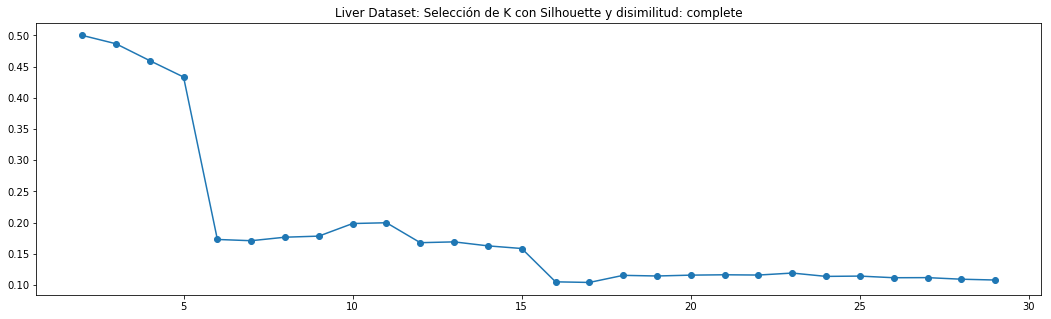

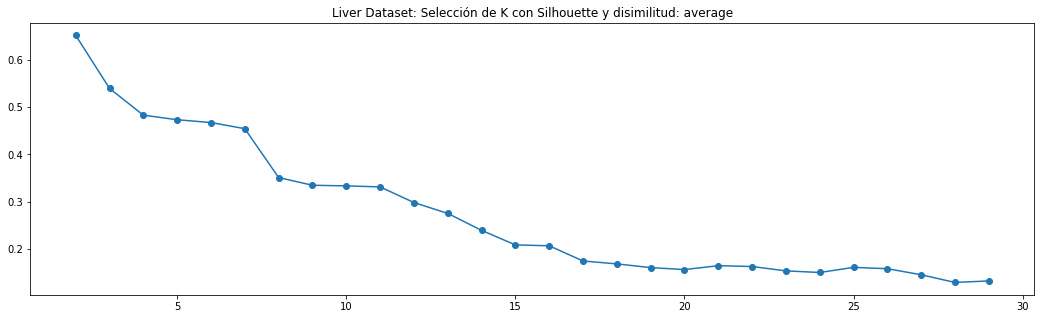

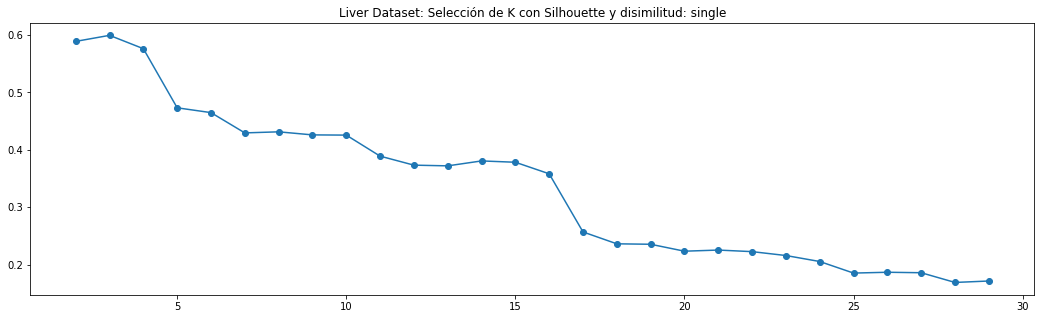

In [17]:
# Utilizamos la libreria scipy por ser la más completa en clustering jerárquico aglomerativo
from scipy.cluster.hierarchy import linkage, cut_tree

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(3)

disimilitudes = {'single', 'complete', 'average'}

# El número de veces que vamos a probar distintos parámetros
total_pruebas = 30

# Lo necesito para saber cuál es la mejor disimilitud
disimilitudes_ejecutadas = []

calidades_clustering = []
calidades_clustering_disimilitud = []
set_k = []
for disimilitud in disimilitudes:
    
    for k in range(2, total_pruebas):
        clustering = linkage(X_liver, disimilitud)
        
        labels_predicted = cut_tree(clustering, n_clusters=k).flatten()
        
        eval=silhouette_score(X_liver,list(labels_predicted))
        
        # Guardamos el valor de silueta de cada k
        calidades_clustering.append(eval)
        calidades_clustering_disimilitud.append(eval)
        
        disimilitudes_ejecutadas.append(disimilitud)
        
        #Guardamos el valor de cada k
        set_k.append(k)
    
    plt.figure(figsize=(18,5))
    plt.plot(range(2, total_pruebas), calidades_clustering_disimilitud, 'o-')
    plt.title("Liver Dataset: Selección de K con Silhouette y disimilitud: " + disimilitud)
    plt.show()    
    calidades_clustering_disimilitud = []

El mejor K es = 6
La mejor medida de disimilitud es = complete


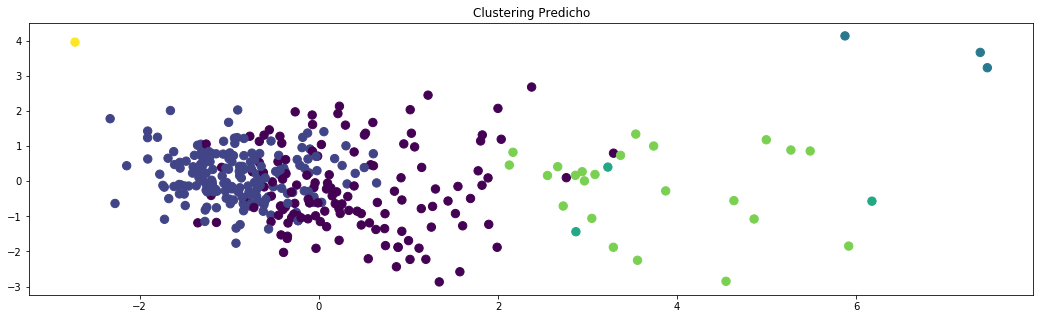


Medidas intrínsecas:
  Silhouette =  0.1729361242583438
  Calinski-Harabaz =  49.04717476458645


In [30]:
# Haciendo uso de la regla del codo y viendo las gráficas, podemos comprobar que la mejor
# disimilitud es "complete" (máxima) y con un k = 6
k=6
disim = 'complete'
print("El mejor K es = " + str(k))
print("La mejor medida de disimilitud es = " + str(disim))


# Repetimos el clustering con la solución que dé la elbow-criteria
##################################################################################
clustering = linkage(X_liver, disim)
labels_predicted = cut_tree(clustering, n_clusters=k).flatten()
    
# Mostrar resultados
fig, ax = plt.subplots(figsize=(18,5))
ax.set_title('Clustering Predicho')
ax.scatter(PCs_liver[:,0], PCs_liver[:,1], c = labels_predicted, s=70)
plt.show()

imprimir_evaluacion_intrinseca(silhouette_score(X_liver, labels_predicted), X_liver, labels_predicted)

ds_1_eval_jerar=silhouette_score(X_liver, labels_predicted)

#### DataSet 2

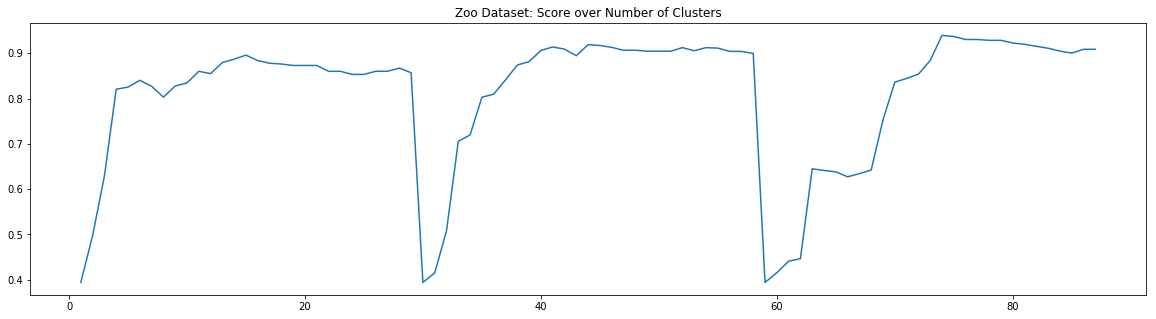

El mejor k es = 16
La mejor medida de disimilitud es = single

Medidas extrínsecas:
  El valor del error cometido es =  0.02970297029702973
  La pureza del agrupamiento =  0.9702970297029703
  La medida F1 =  0.8678100232295125

Medidas intrínsecas:
  Silhouette =  0.35773235683435
  Calinski-Harabaz =  23.59279999334151


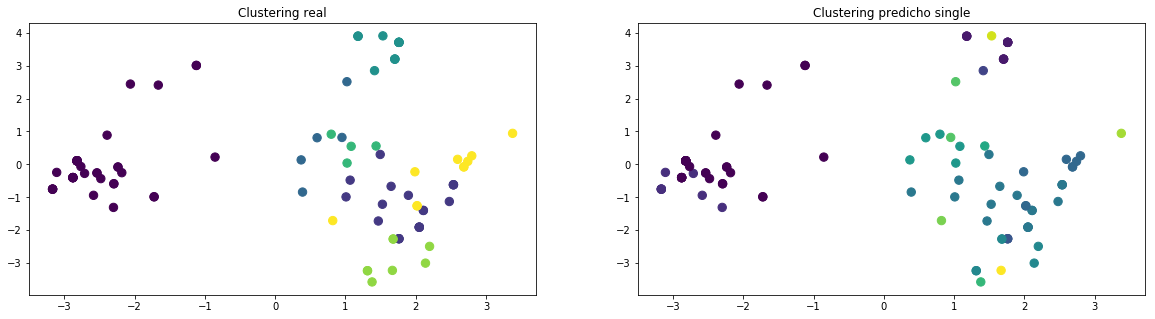

In [31]:
# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(4)

disimilitudes = {'single', 'complete', 'average'}

# El número de veces que vamos a probar distintos parámetros
total_pruebas = 30

# Lo necesito para saber cuál es la mejor disimilitud
disimilitudes_ejecutadas = []

calidades_clustering = []
for disimilitud in disimilitudes:
    
    for k in range(1, total_pruebas):
        clustering = linkage(X_zoo, disimilitud)

         # Calculamos la matriz de confusión
        mC = matriz_confusion(zoo_label, cut_tree(clustering, n_clusters=k).flatten())

        # Para calcular la calidad total del clustering, asignamos unos pesos a las distintas medidas.
        # Por ejemplo, nos parece más importante la medida del error que el de la pureza
        calidad_total = medida_calidad(mC)

        calidades_clustering.append(calidad_total)
        disimilitudes_ejecutadas.append(disimilitud)
        
plt.figure(figsize=(20,5))
plt.plot(list(range(1, len(disimilitudes_ejecutadas)+1)), calidades_clustering )
plt.title("Zoo Dataset: Score over Number of Clusters")
plt.show()

# Recojo el índice del mejor clustering
indice_mejor = encontrar_mejor_clustering(calidades_clustering)

# Sumo 1 porque en el bucle anterior he empezado por un k = 1
mejor_k = encontrar_mejor_clustering(calidades_clustering)%(total_pruebas-1) + 1

mejor_disimilitud = disimilitudes_ejecutadas[indice_mejor]

print("El mejor k es = " + str(mejor_k))
print("La mejor medida de disimilitud es = " + mejor_disimilitud)

# Repetimos el clustering con la solución que optimiza la variable 'mejor_disimilitud'
##################################################################################

clustering = linkage(X_zoo, mejor_disimilitud)

# Calculamos la matriz de confusión
y_pred = cut_tree(clustering, n_clusters=mejor_k).flatten()
mC = matriz_confusion(zoo_label, y_pred)

imprimir_evaluacion_extrinseca(mC)

imprimir_evaluacion_intrinseca(silhouette_score(X_zoo,y_pred), X_zoo, y_pred)

# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = zoo_label, s=70)
ax[1].set_title('Clustering predicho ' + mejor_disimilitud)
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=cut_tree(clustering, n_clusters=mejor_k).flatten(), s=70)
plt.show()


ds_2_eval_jerar=medida_f1(mC)

#### 3. AGRUPAMIENTO ESPECTRAL

#### DataSet 1

Elección del número de clusters usando el método máxima silhouette.

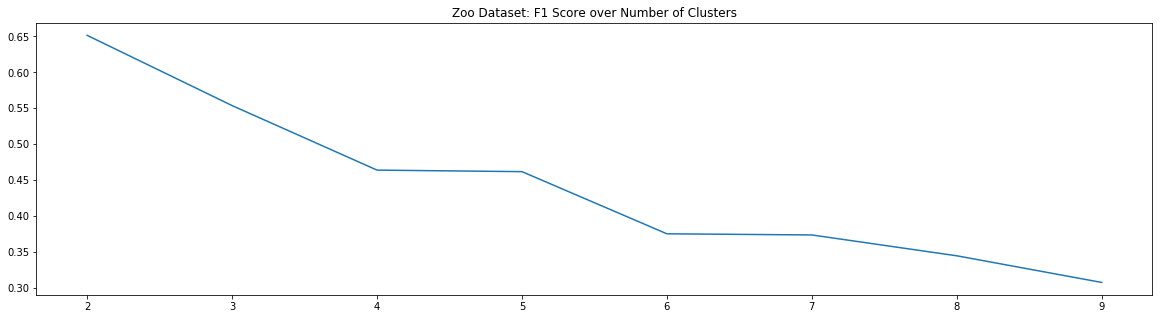

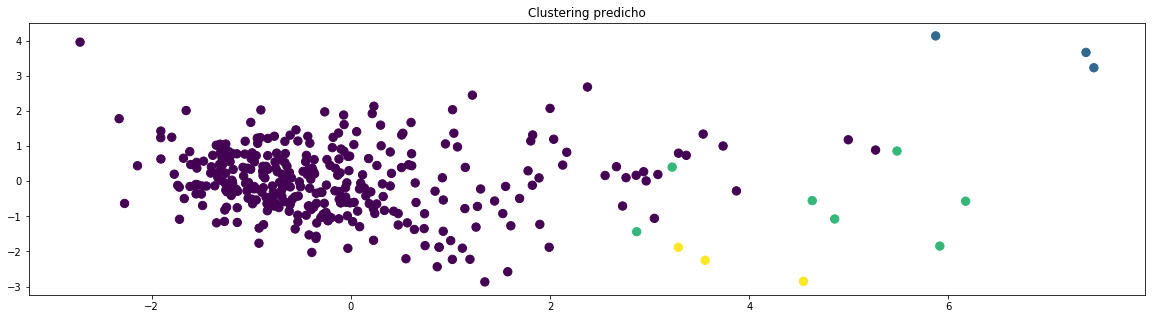

El mejor agrupamiento tiene 4 clusters:

Medidas intrínsecas:
  Silhouette =  0.4640685903152183
  Calinski-Harabaz =  36.68012070761687


In [20]:
from sklearn.cluster import SpectralClustering

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(6)

# Explorar la bondad del agrupamiento en función al número de clusters
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

scores = []
for n_clusters in range(MIN_CLUSTERS,MAX_CLUSTERS):
    clf = SpectralClustering(n_clusters=n_clusters)
    y_pred = clf.fit_predict(X_liver)
    scores.append( silhouette_score(X_liver, y_pred) )

plt.figure(figsize=(20,5))
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), scores )
plt.title("Zoo Dataset: F1 Score over Number of Clusters")
plt.show()

# Aplicar el mejor resultado
best_n_clusters = 2
y_pred = SpectralClustering(n_clusters=MIN_CLUSTERS + best_n_clusters).fit_predict(X_liver)

# Mostrar resultados
fig = plt.figure(figsize=(20,5))
plt.title('Clustering predicho')
plt.scatter(PCs_liver[:,0], PCs_liver[:,1], c=y_pred, s=70)
plt.show()

print("El mejor agrupamiento tiene {} clusters:".format(MIN_CLUSTERS + best_n_clusters))

score = silhouette_score(X_liver, y_pred)
imprimir_evaluacion_intrinseca(score, X_liver, y_pred)
ds_1_eval_spect=score

#### DataSet 2

Elección del número de clusters basado en maximización de la métrica propia de calidad.

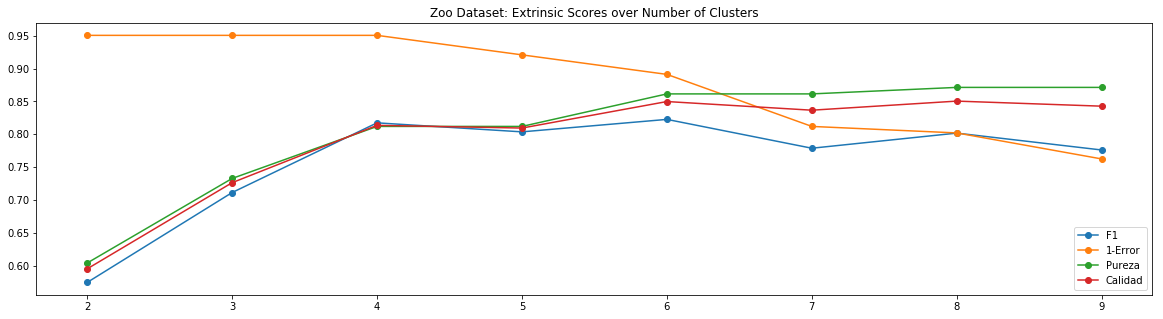

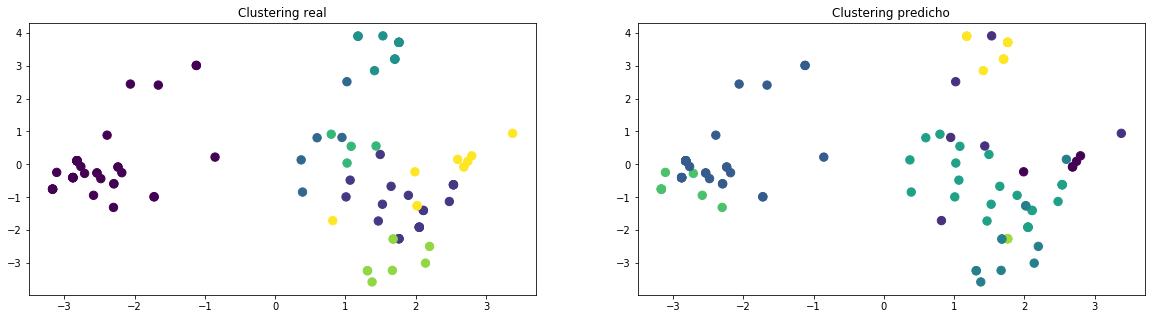

El mejor agrupamiento tiene 8 clusters:

Medidas extrínsecas:
  El valor del error cometido es =  0.12871287128712872
  La pureza del agrupamiento =  0.8712871287128714
  La medida F1 =  0.8017039656924771

Medidas intrínsecas:
  Silhouette =  0.3675610357802425
  Calinski-Harabaz =  34.206855049246414


In [21]:
from sklearn.cluster import SpectralClustering

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(6)

# Explorar la bondad del agrupamiento en función al número de clusters
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

f1_scores, error_scores, pureza_scores, calidad_scores = [], [], [], []
for n_clusters in range(MIN_CLUSTERS,MAX_CLUSTERS):
    clf = SpectralClustering(n_clusters=n_clusters)
    y_pred = clf.fit_predict(X_zoo)
    confusion = matriz_confusion(zoo_label.values,y_pred)
    f1_scores.append( medida_f1(confusion) )
    error_scores.append( 1-medida_error(confusion) )
    pureza_scores.append( medida_pureza(confusion) )
    calidad_scores.append(medida_calidad(confusion))

plt.figure(figsize=(20,5))
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), f1_scores, 'o-')
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), error_scores, 'o-' )
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), pureza_scores, 'o-' )
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), calidad_scores, 'o-' )
plt.title("Zoo Dataset: Extrinsic Scores over Number of Clusters")
plt.legend(['F1', '1-Error', 'Pureza', 'Calidad'])
plt.show()

# Aplicar el mejor resultado
best_n_clusters = np.argmax(calidad_scores)
y_pred = SpectralClustering(n_clusters=MIN_CLUSTERS + best_n_clusters).fit_predict(X_zoo)
mC = matriz_confusion(zoo_label.values, y_pred)

# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=zoo_label, s=70)
ax[1].set_title('Clustering predicho')
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=y_pred, s=70)
plt.show()

print("El mejor agrupamiento tiene {} clusters:".format(MIN_CLUSTERS + best_n_clusters))
imprimir_evaluacion_extrinseca(mC)

imprimir_evaluacion_intrinseca(silhouette_score(X_zoo,y_pred), X_zoo, y_pred)

ds_2_eval_spect=medida_f1(mC)

#### 4. AGRUPAMIENTO POR DENSIDAD

#### DataSet 1

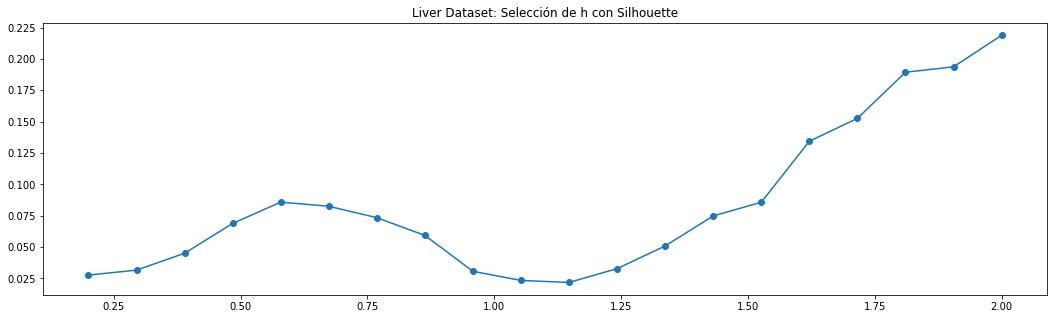

In [22]:
# Vamos a utilizar el método de desplazamiento de media
from sklearn.cluster import MeanShift

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(7)

# Rango dinámico del tamaño de kernel que vamos a estudiar
total_pruebas = np.linspace(0.2,2,20)

calidades_clustering = []
set_h = []
for h in total_pruebas:
    
    clustering = MeanShift(bandwidth = h).fit(X_liver)
    
    # Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
    clustering.labels_  = clustering.labels_ + 1

    eval=silhouette_score(X_liver,clustering.labels_)

    # Guardamos el valor de silueta de cada h
    calidades_clustering.append(eval)
    
    #Guardamos el valor de cada h
    set_h.append(h)

plt.figure(figsize=(18,5))
plt.plot(list(total_pruebas), calidades_clustering, 'o-')
plt.title("Liver Dataset: Selección de h con Silhouette")
plt.show()

El mejor h es = 0.9578947368421054


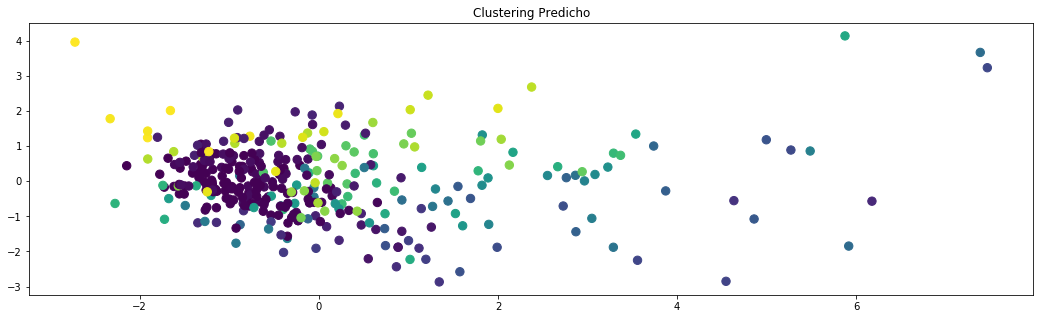


Medidas intrínsecas:
  Silhouette =  0.9578947368421054
  Calinski-Harabaz =  18.540257254625796


In [32]:
#Haciendo uso de la regla del codo, establecemos h cerca de 0.90, visualmente sabemos que es el índice 3 de set_h
indice_h = 8
h = set_h[indice_h]
print("El mejor h es = " + str(h))


# Repetimos el clustering con la solución que dé la elbow-criteria
##################################################################################

clustering = MeanShift(bandwidth = h).fit(X_liver)
    
# Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
clustering.labels_  = clustering.labels_ + 1
    
# Mostrar resultados
fig, ax = plt.subplots(figsize=(18,5))
ax.set_title('Clustering Predicho')
ax.scatter(PCs_liver[:,0], PCs_liver[:,1], c = clustering.labels_, s=70)
plt.show()

imprimir_evaluacion_intrinseca(set_h[indice_h], X_liver, clustering.labels_)

ds_1_eval_densi=set_h[indice_h]

#### DataSet 2

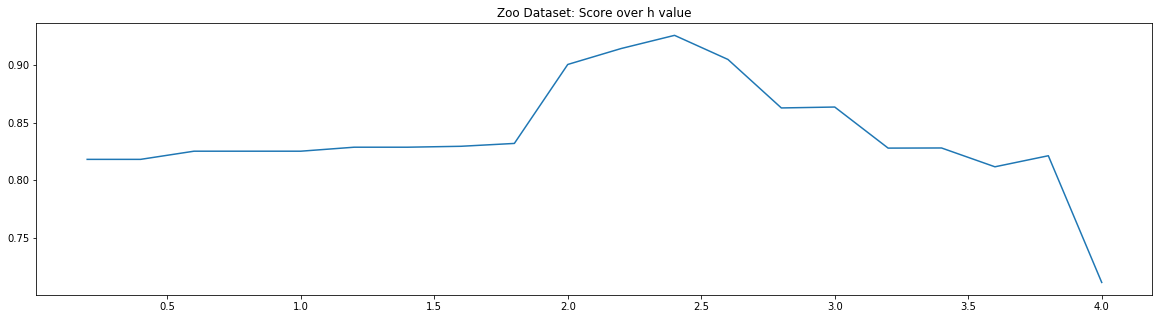

El mejor h es = 2.4


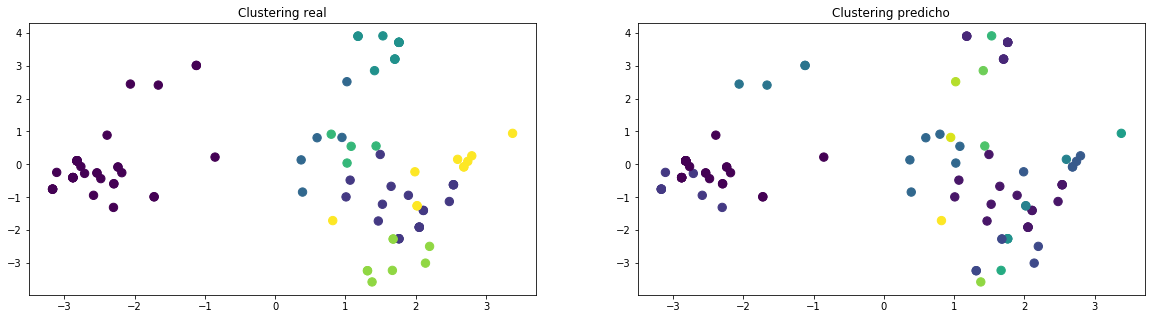


Medidas extrínsecas:
  El valor del error cometido es =  0.02970297029702973
  La pureza del agrupamiento =  0.9702970297029703
  La medida F1 =  0.820965899678771

Medidas intrínsecas:
  Silhouette =  0.41788808210136263
  Calinski-Harabaz =  23.59279999334151


In [33]:
# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(8)

# Rango dinámico del tamaño de kernel que vamos a estudiar
total_pruebas = np.linspace(0.2,4,20)

calidades_clustering = []
for h in total_pruebas:
    clustering = MeanShift(bandwidth = h).fit(X_zoo)
    
    # Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
    clustering.labels_  = clustering.labels_ + 1
    
    # Calculamos la matriz de confusión
    mC = matriz_confusion(zoo_label, clustering.labels_)
    
    # Para calcular la calidad total del clustering, asignamos unos pesos a las distintas medidas.
    # Por ejemplo, nos parece más importante la medida del error que el de la pureza
    calidad_total = medida_calidad(mC)
    
    calidades_clustering.append(calidad_total)
    
plt.figure(figsize=(20,5))
plt.plot(list(total_pruebas), calidades_clustering )
plt.title("Zoo Dataset: Score over h value")
plt.show()

#Posicion del mejor clustering
mejor_h = encontrar_mejor_clustering(calidades_clustering) 

print("El mejor h es = " + str(total_pruebas[mejor_h]))


# Repetimos el clustering con la solución que optimiza la variable 'calidad_total'
##################################################################################

clustering = MeanShift(bandwidth = total_pruebas[mejor_h]).fit(X_zoo)
    
# Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
clustering.labels_  = clustering.labels_ + 1
    
# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = zoo_label, s=70)
ax[1].set_title('Clustering predicho')
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = clustering.labels_, s=70)
plt.show()

# Calculamos la matriz de confusión
mC = matriz_confusion(zoo_label, clustering.labels_)

imprimir_evaluacion_extrinseca(mC)

imprimir_evaluacion_intrinseca(silhouette_score(X_zoo,clustering.labels_), X_zoo, y_pred)

ds_2_eval_densi=medida_f1(mC)

#### 5. AGRUPAMIENTO PROBABILÍSTICO

#### DataSet 1

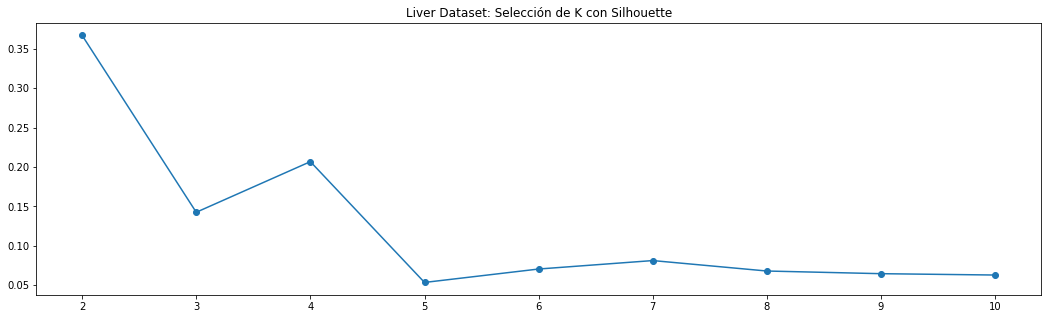

In [25]:
# Vamos a utilizar el método de mixtura gaussiana
from sklearn.mixture import GaussianMixture
import random

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(9)

# Al tratarse de un método probabilístico y no determinista, tenemos que elegir el modelo que mejor funcione 
# dentro de la batería de pruebas que se realizan para saber cuál es el mejor valor de K.
# Este método depende en gran medida de la inicialización, de esta forma habrá que realizar varias medidas repetidas
# con el mismo valor de K y escoger la que mejor funcione (en base a los criterios de validación)

# Rango dinámico del tamaño de kernel que vamos a estudiar
total_clusters = range(2,11)

new_init=[]
set_k=[]
set_model_1=[]
set_model_2=[]

for k in range(2,11):
    
    #Realizamos 50 inicializaciones y elegimos la que mejor score se extraiga de la funcion silhouette
    for it in range(50):

        modelo = GaussianMixture(n_components = k, max_iter = 200).fit(X_liver)
        labels_predicted = modelo.predict(X_liver)

        eval=silhouette_score(X_liver,labels_predicted)
        
        new_init.append(eval)
        set_model_1.append(modelo)
    
    #Nos quedamos con un valor de silhouette por cada valor de número de clusters
    set_model_2.append(set_model_1[np.argmax(eval)])
    set_k.append(np.max(eval))
    set_model_1=[]

plt.figure(figsize=(18,5))
plt.plot(list(range(2,11)), set_k, 'o-')
plt.title("Liver Dataset: Selección de K con Silhouette")
plt.show()
    


El mejor K es = 3


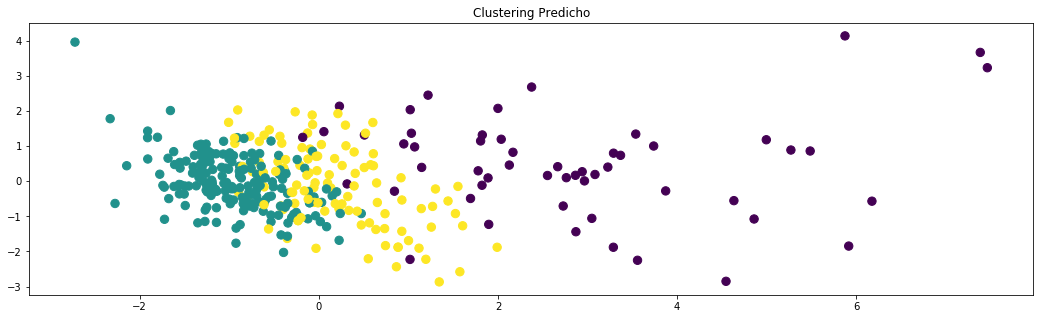


Medidas intrínsecas:
  Silhouette =  0.1426094429875238
  Calinski-Harabaz =  76.45722236380897


In [26]:
#Haciendo uso de la regla del codo, establecemos K=3
k=3
print("El mejor K es = " + str(k))


# Repetimos el clustering con la solución que dé la elbow-criteria
##################################################################################

modelo_final= set_model_2[k-2]
labels_predicted = modelo_final.predict(X_liver)
    
# Mostrar resultados
fig, ax = plt.subplots(figsize=(18,5))
ax.set_title('Clustering Predicho')
ax.scatter(PCs_liver[:,0], PCs_liver[:,1], c = labels_predicted, s=70)
plt.show()

imprimir_evaluacion_intrinseca(set_k[k-2], X_liver, labels_predicted)

ds_1_eval_prob=set_k[k-2]

#### DataSet 2

El mejor K es = 7

Medidas extrínsecas:
  El valor del error cometido es =  0.05940594059405946
  La pureza del agrupamiento =  0.9405940594059405
  La medida F1 =  0.9326930351346016

Medidas intrínsecas:
  Silhouette =  0.3845133363727084
  Calinski-Harabaz =  36.24205005476321


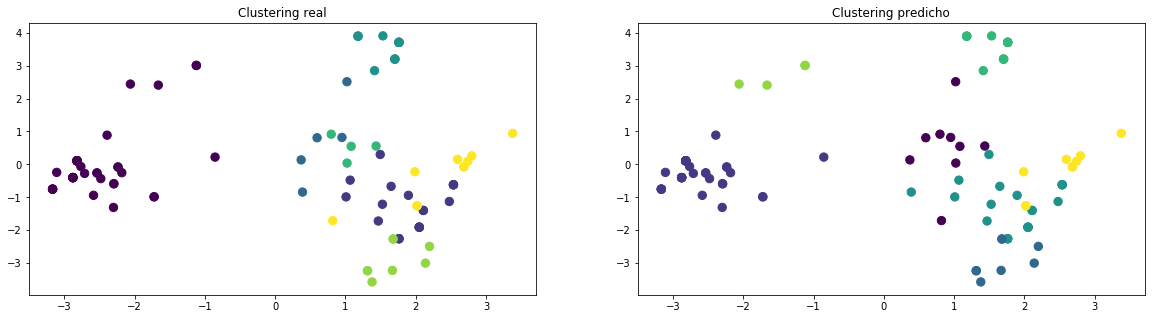

In [27]:
# Vamos a utilizar el método de mixtura gaussiana

# Ponemos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(10)

# Al tratarse de un método probabilístico y no determinista, tenemos que elegir el modelo que mejor funcione 
# dentro de la batería de pruebas que se realizan para saber cuál es el mejor valor de K.
# Este método depende en gran medida de la inicialización, de esta forma habrá que realizar varias medidas repetidas
# con el mismo valor de K y escoger la que mejor funcione (en base a los criterios de validación)

# Rango dinámico del tamaño de kernel que vamos a estudiar
total_clusters = range(1,11)

calidades_clustering = []
set_modelos=[]
set_k=[]

for it in range(200):
    
    k=random.randrange(1, 11, 1)

    modelo = GaussianMixture(n_components = k, max_iter = 200).fit(X_zoo)
    labels_predicted = modelo.predict(X_zoo)
    
    # Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
    labels_predicted  = labels_predicted + 1
    
    # Calculamos la matriz de confusión
    mC = matriz_confusion(zoo_label, labels_predicted)
    
    # Para calcular la calidad total del clustering, asignamos unos pesos a las distintas medidas.
    # Por ejemplo, nos parece más importante la medida del error que el de la pureza
    calidad_total = medida_calidad(mC)
    
    calidades_clustering.append(calidad_total)
    set_modelos.append(modelo)
    set_k.append(k)

#Posicion del mejor clustering
mejor_h = encontrar_mejor_clustering(calidades_clustering) 
print("El mejor K es = " + str(set_k[mejor_h]))


# Repetimos el clustering con la solución que optimiza la variable 'calidad_total'
##################################################################################

modelo_final= set_modelos[mejor_h]
labels_predicted = modelo_final.predict(X_zoo)

# Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
labels_predicted  = labels_predicted + 1

# Calculamos la matriz de confusión
mC = matriz_confusion(zoo_label, labels_predicted)
    
# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = zoo_label, s=70)
ax[1].set_title('Clustering predicho')
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = labels_predicted, s=70)


imprimir_evaluacion_extrinseca(mC)

imprimir_evaluacion_intrinseca(silhouette_score(X_zoo,labels_predicted), X_zoo, labels_predicted)

ds_2_eval_prob=medida_f1(mC)

#### 6. COMPARATIVA

#### DataSet 1

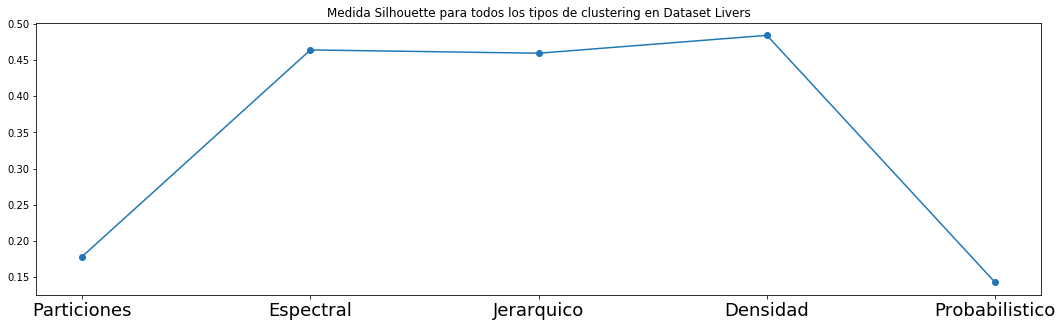

Silhouette(Particiones): 0.17838427477610674
Silhouette(Espectral): 0.4640685903152183
Silhouette(Jerarquico): 0.4595196509704513
Silhouette(Densidad): 0.4842105263157895
Silhouette(Probabilistico): 0.1426094429875238


In [28]:
scores = [ds_1_eval_part,ds_1_eval_spect,ds_1_eval_jerar,ds_1_eval_densi,ds_1_eval_prob]
models = ['Particiones', 'Espectral', 'Jerarquico', 'Densidad', 'Probabilistico']

plt.figure(figsize=(18,5))
plt.plot(scores, 'o-')
plt.title("Medida Silhouette para todos los tipos de clustering en Dataset Livers")
plt.xticks(range(5), models, fontsize=18)
plt.show()

for score, model in zip(scores, models):
    print("Silhouette({}): {}".format(model, score))

En este caso, se puede observar que el modelo jerárquico y el modelo de densidad son las estratégias que generan unos agrupamientos más compactos en relación a la distancia inter-cluster.

#### DataSet 2

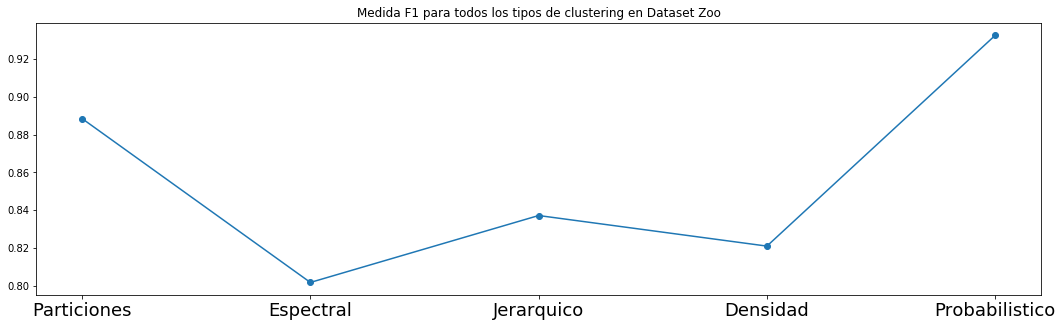

F1(Particiones): 0.8885628637322602
F1(Espectral): 0.8017039656924771
F1(Jerarquico): 0.8371788633867593
F1(Densidad): 0.820965899678771
F1(Probabilistico): 0.9326930351346016


In [29]:
scores = [ds_2_eval_part,ds_2_eval_spect,ds_2_eval_jerar,ds_2_eval_densi,ds_2_eval_prob]
models = ['Particiones', 'Espectral', 'Jerarquico', 'Densidad', 'Probabilistico']

plt.figure(figsize=(18,5))
plt.plot(scores, 'o-')
plt.title("Medida F1 para todos los tipos de clustering en Dataset Zoo")
plt.xticks(range(5), models, fontsize=18)
plt.show()

for score, model in zip(scores, models):
    print("F1({}): {}".format(model, score))

Como se puede observar, el modelo de particiones usando KMeans y el modelo probabilístico son las estratégias que presentan una mayor eficacia a la hora de agrupar los datos según la métrica F1.